In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import tensorflow as tf

In [4]:
# GPU availability
tf.test.is_gpu_available()

True

In [5]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [6]:
# tensorflow with cuda support
tf.test.is_built_with_cuda()

True

**Dense** works on 1D array,
**CIFAR10** dataset, is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories
**matplotlib inline** for layout

In [7]:
# Loading libraries
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation, Input, Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing import image

# omitting warnings ignore/always
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [8]:
# Datasets splitting
#xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

(xtrain, ytrain), _ = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [9]:
xtrain

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [10]:
# Rescalling pixel value
xtrain/255

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

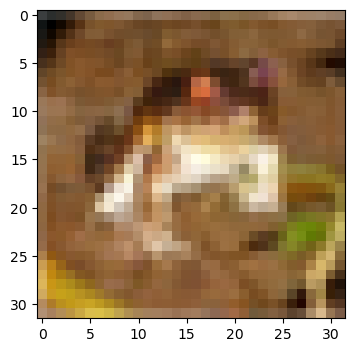

In [11]:
# canvas
plt.figure(figsize=(6,4))
plt.imshow(xtrain[0])
plt.show()

In [12]:
# input shape
xtrain[0].shape

(32, 32, 3)

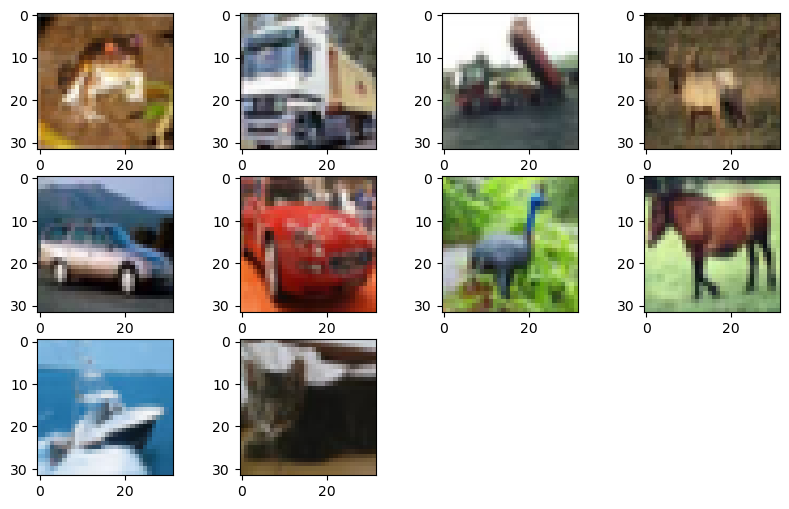

In [13]:
# canvas
fig = plt.figure(figsize=(10,6))
# first 10 images
for i in range(10):
    fig.add_subplot(3,4, i+1)
    plt.imshow(xtrain[i])
plt.show()

<p> <b>Kernel</b> is noting but like a filter that is used to extract the features from images. it is a <b>matrix</b> that moves on input data by stride value, performing dot(,) product with subregion of input data. <b>kernel_size</b> specifying the height and width of the 2D convolution window </p>
<p> <b>filter</b> bypass image after reducing noise. Filter can be odd/even (2,2) or (3,3), whereas kernel_size is always odd like (3,3)<p>
<p> <b>Pooling</b> layer is the sampling technology which reduces dimension of input. set Pool_size to (2,2) is the best approach</p>
<p> <b>Padding</b> is the Border problem solver. Adding 1 padding to the input preserve same inormation along with kernel</p>


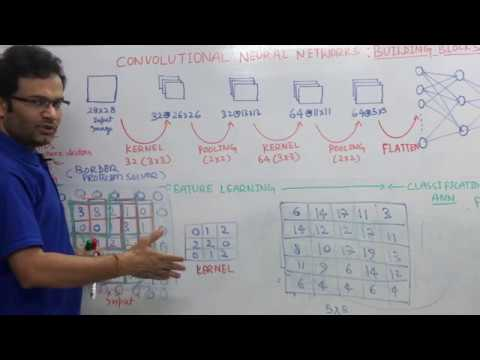

In [14]:
from IPython.display import YouTubeVideo
YouTubeVideo('Y1qxI-Df4Lk', width=800, height=450)

In [15]:
model = Sequential()
model.add(Conv2D(
    input_shape=(32,32,3),
    filters = 10,
    kernel_size=(3,3),
    strides=(1,1),
    padding="valid",
    activation = "relu"
))
model.output_shape

(None, 30, 30, 10)

In [16]:
model = Sequential()
model.add(Conv2D(
    input_shape=(32,32,3),
    filters = 10,
    kernel_size=(3,3),
    strides=(1,1),
    padding="same",
    activation = "relu"
))
model.output_shape

(None, 32, 32, 10)

In [17]:
model = Sequential()
model.add(Conv2D(
    input_shape=(32,32,3),
    filters = 20,
    kernel_size=(3,3),
    strides=(1,1),
    padding="same",
    activation = "relu"
))
model.output_shape

(None, 32, 32, 20)

In [18]:
model = Sequential()
model.add(Conv2D(
    input_shape=(32,32,3),
    filters = 10,
    kernel_size=(9,9),
    strides=(1,1),
    padding="same",
    activation = "relu"
))
model.output_shape

(None, 32, 32, 10)

In [19]:
model = Sequential()
model.add(Conv2D(
    input_shape=(32,32,3),
    filters = 10,
    kernel_size=(3,3),
    strides=(1,1),
    padding="same",
    activation = "relu"
))
model.add(MaxPooling2D(pool_size= (2,2)))
model.output_shape

(None, 16, 16, 10)

In [20]:
model = Sequential()
model.add(Conv2D(
    input_shape=(32,32,3),
    filters = 10,
    kernel_size=(3,3),
    strides=(1,1),
    padding="valid",
    activation = "relu"
))
model.output_shape

(None, 30, 30, 10)

In [21]:
model = Sequential()
model.add(Conv2D(
    input_shape=(32,32,3),
    filters = 10,
    kernel_size=(3,3),
    strides=(1,1),
    padding="valid",
    activation = "relu"
))
model.add(MaxPooling2D(pool_size= (2,2)))
model.output_shape

(None, 15, 15, 10)

In [22]:
model = Sequential()
model.add(Conv2D(
    input_shape=(32,32,3),
    filters = 10,
    kernel_size=(3,3),
    strides=(1,1),
    padding="valid",
    activation = "relu"
))
model.add(MaxPooling2D(pool_size= (2,2), padding = "valid"))
model.output_shape

(None, 15, 15, 10)

In [23]:
model = Sequential()
model.add(Conv2D(
    input_shape=(32,32,3),
    filters = 10,
    kernel_size=(3,3),
    strides=(1,1),
    padding="valid",
    activation = "relu"
))
model.add(MaxPooling2D(pool_size= (2,2), padding = "same"))
model.output_shape

(None, 15, 15, 10)

In [24]:
model = Sequential()
model.add(Conv2D(
    input_shape=(32,32,3),
    filters = 10,
    kernel_size=(3,3),
    strides=(1,1),
    padding="valid",
    activation = "relu"
))
model.add(MaxPooling2D(pool_size= (2,2), padding = "valid", strides= (1,1)))
model.output_shape

(None, 29, 29, 10)

In [25]:
model = Sequential()
model.add(Conv2D(
    input_shape=(32,32,3),
    filters = 10,
    kernel_size=(3,3),
    strides=(1,1),
    padding="valid",
    activation = "relu"
))
model.add(MaxPooling2D(pool_size= (2,2), padding = "valid", strides= (2,2)))
model.output_shape

(None, 15, 15, 10)

In [26]:
model = Sequential()
model.add(Conv2D(
    input_shape=(32,32,3),
    filters = 10,
    kernel_size=(3,3),
    strides=(1,1),
    padding="valid",
    activation = "relu"
))
model.add(MaxPooling2D(pool_size= (2,2), padding = "same", strides= (2,2)))
model.output_shape

(None, 15, 15, 10)

In [27]:
model = Sequential()
model.add(Conv2D(
    input_shape=(32,32,3),
    filters = 10,
    kernel_size=(3,3),
    strides=(1,1),
    padding="same",
    activation = "relu"
))
model.add(MaxPooling2D(pool_size= (2,2), padding = "same", strides= (2,2)))
model.output_shape

(None, 16, 16, 10)

In [28]:
model = Sequential()
model.add(Conv2D(
    input_shape=(32,32,3),
    filters = 10,
    kernel_size=(3,3),
    strides=(1,1),
    padding="valid",
    activation = "relu"
))
model.add(GlobalAveragePooling2D())
model.output_shape

(None, 10)

In [29]:
model = Sequential()
model.add(Conv2D(
    input_shape=(32,32,3),
    filters = 10,
    kernel_size=(3,3),
    strides=(1,1),
    padding="valid",
    activation = "relu"
))
model.output_shape

(None, 30, 30, 10)

In [30]:
# Multi dimention to single dimention
model.add(Flatten())
model.output_shape

(None, 9000)

In [31]:
model.add(Dense(2))
model.output_shape

(None, 2)